# Evaluation of pressure coefficients

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import error_norms, average_surface_data, sample_surface_field

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

exp_data = "../exp_data/"
run = "/media/andre/ElementsSE/naca0012_shock_buffet/run/"
output = "./output/"
!mkdir -p output

print("Matplolib version: ", mpl.__version__)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Pandas version:  1.2.1
Numpy version:  1.19.5


## Experimental pressure coefficient data

In [2]:
cp_exp = {}
names = ["x", "cp"]
for s in ["set1", "set4", "set5", "set6"]:
    cp_exp[s] = (
        pd.read_csv(exp_data + "{:s}_cp_upper.csv".format(s), sep=",", names=names, header=0),
        pd.read_csv(exp_data + "{:s}_cp_lower.csv".format(s), sep=",", names=names, header=0)
    )
cp_exp["set1"][0].head()

,x,cp
0,0.000,1.060
1,0.025,-0.532
2,0.050,-0.739
3,0.075,-0.904
4,0.100,-0.970


## Influence of various simulation parameters on set 1 with $\alpha =2$
### Expansion ratio in surface normal direction
#### Wall-functions for $\nu_t$ and $\alpha_t$

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g625/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
Mean amplitude lower/upper side: 0.0291/0.0266
Mean stdev. lower/upper side: 0.0057/0.0055
L1/L2/Lmax upper side:  (0.07226349683870188, 0.026527829578231677, 0.6069721513020487)
L1/L2/Lmax lower side:  (0.06542161830612153, 0.016215528916418358, 0.45829003002215196)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g625/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
yPlus mean/min/max upper side: 104.8160/46.9257/149.2233
yPlus mean/min/max lower side: 111.8220/20.2358/127.4411
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_idde

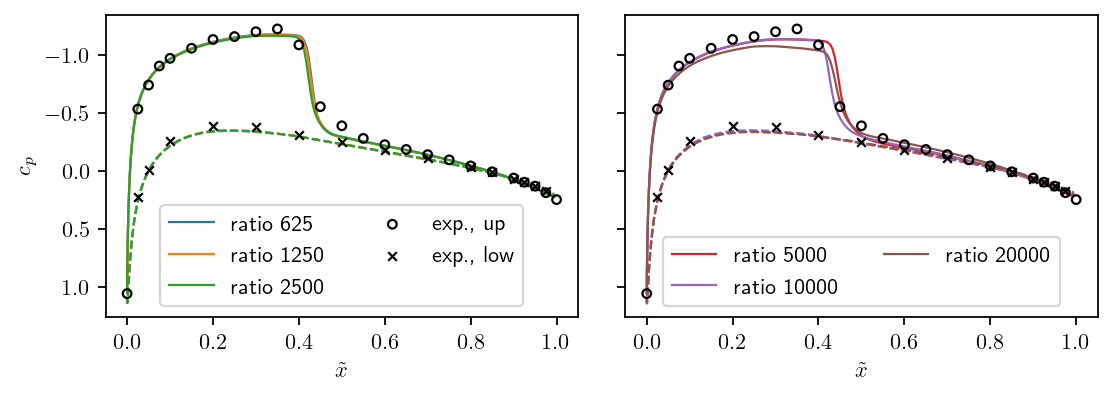

In [3]:
fig, axarr = plt.subplots(1, 2, figsize=(8, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_iddes_spalding_g{:d}".format(i) for i in [625, 1250, 2500, 5000, 10000, 20000]]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.15)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.15)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    if i < 3:
        ax = axarr[0]
    else:
        ax = axarr[1]
    #ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=r"ratio {:s}".format(case.split("_")[-1][1:]))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

for i, ax in enumerate(axarr):
    if i == 0:
        ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
        ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
    else:
        ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10)
        ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10)
    ax.set_xlabel(r"$\tilde{x}$")
    ax.legend(loc=8, ncol=2)

axarr[0].set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_grading_wall_function.pdf", bbox_inches="tight")
plt.show()

#### Default interpolation

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g1250/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
Mean amplitude lower/upper side: 0.0333/0.0279
Mean stdev. lower/upper side: 0.0065/0.0057
L1/L2/Lmax upper side:  (0.14823529568113825, 0.10467716097934313, 1.3470863190947173)
L1/L2/Lmax lower side:  (0.08724712713258437, 0.017934921992868214, 0.4452753017733311)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g1250/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
yPlus mean/min/max upper side: 35.2300/25.7264/38.8486
yPlus mean/min/max lower side: 35.6230/9.0101/38.3392
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g2500/postProcessing/

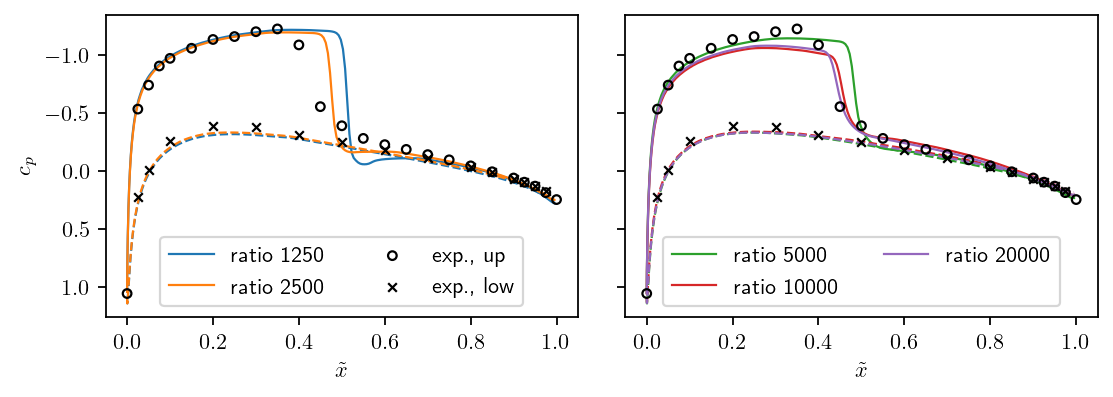

In [4]:
fig, axarr = plt.subplots(1, 2, figsize=(8, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_iddes_g{:d}".format(i) for i in [1250, 2500, 5000, 10000, 20000]]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.15)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.15)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    if i < 2:
        ax = axarr[0]
    else:
        ax = axarr[1]
    #ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=r"ratio {:s}".format(case.split("_")[-1][1:]))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

for i, ax in enumerate(axarr):
    if i == 0:
        ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
        ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
    else:
        ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10)
        ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10)
    ax.set_xlabel(r"$\tilde{x}$")
    ax.legend(loc=8, ncol=2)

axarr[0].set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_grading_default.pdf", bbox_inches="tight")
plt.show()

### Fixed expansion ratio of 2500, wall functions, tangential refinement

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g2500/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
Mean amplitude lower/upper side: 0.0295/0.0240
Mean stdev. lower/upper side: 0.0059/0.0051
L1/L2/Lmax upper side:  (0.0770138950351722, 0.024560059152648153, 0.5979415103013705)
L1/L2/Lmax lower side:  (0.06205971269180944, 0.015925593545174567, 0.45716060748314413)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g2500/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
yPlus mean/min/max upper side: 32.4878/12.1143/48.5257
yPlus mean/min/max lower side: 34.6799/6.7244/39.1258
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_sp

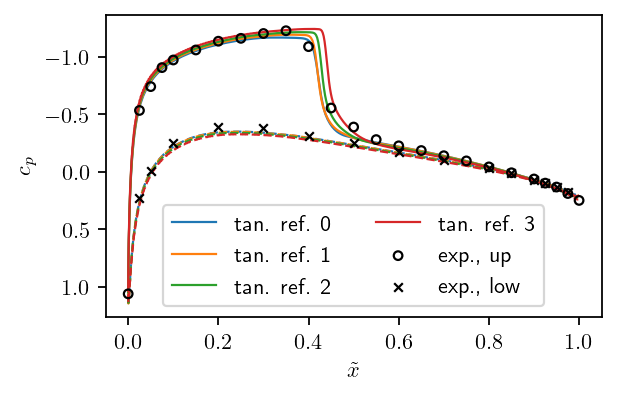

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_iddes_spalding_g2500{:s}".format(s) for s in ["", "_t1.5", "_t2.0", "_t2.5"]]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.15)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.15)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    #ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=r"tan. ref. {:d}".format(i))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(loc=8, ncol=2)

ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_g2500_tref_wall_function.pdf", bbox_inches="tight")
plt.show()

### Uniform refinement
#### Wall functions for $\nu_t$ and $\alpha_t$

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
Mean amplitude lower/upper side: 0.0364/0.0316
Mean stdev. lower/upper side: 0.0067/0.0066
L1/L2/Lmax upper side:  (0.08529780027334405, 0.03148362414055655, 0.6045904025648602)
L1/L2/Lmax lower side:  (0.060053132537467545, 0.016032138785954633, 0.4622601253666617)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
yPlus mean/min/max upper side: 9.8373/2.7331/13.8960
yPlus mean/min/max lower side: 10.6693/3.0276/12.2752
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_sp

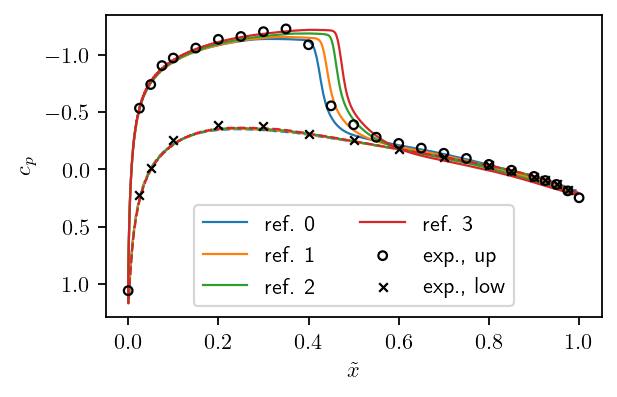

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_iddes_spalding_g10000{:s}".format(s) for s in ["", "_ref1", "_ref2", "_ref3"]]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.15)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.15)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    #ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=r"ref. {:d}".format(i))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(loc=8, ncol=2)

ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_ref_wall_function.pdf", bbox_inches="tight")
plt.show()

#### Default interpolation

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
Mean amplitude lower/upper side: 0.0478/0.0453
Mean stdev. lower/upper side: 0.0087/0.0086
L1/L2/Lmax upper side:  (0.1721442899737097, 0.19750449731766576, 2.0643659584565746)
L1/L2/Lmax lower side:  (0.06338081816802446, 0.018839353548278644, 0.5041468691564015)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
yPlus mean/min/max upper side: 9.7151/5.9348/12.2999
yPlus mean/min/max lower side: 10.1452/3.2655/11.2427
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1/postProces

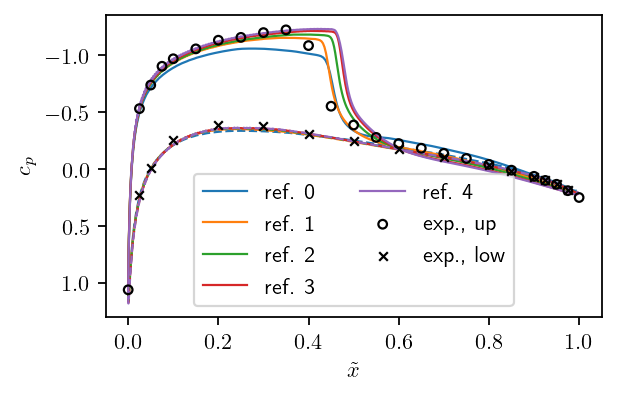

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_iddes_g10000{:s}".format(s) for s in ["", "_ref1", "_ref2", "_ref3", "_ref4"]]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.15)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.15)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    #ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=r"ref. {:d}".format(i))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(loc=8, ncol=2)

ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_ref_default.pdf", bbox_inches="tight")
plt.show()

### Influence of the divergence scheme

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
Mean amplitude lower/upper side: 0.0316/0.0323
Mean stdev. lower/upper side: 0.0065/0.0062
L1/L2/Lmax upper side:  (0.05092009877958906, 0.008370765674991325, 0.373281655956763)
L1/L2/Lmax lower side:  (0.01877939096796825, 0.0007468710775304801, 0.06791983633518042)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.15...0.25s (100 snapshots)
yPlus mean/min/max upper side: 6.4240/1.0731/9.2174
yPlus mean/min/max lower side: 7.1939/1.9852/8.2910
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1_

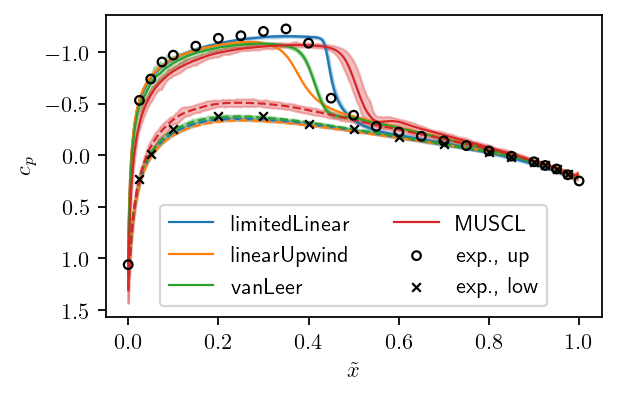

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_iddes_g10000_ref1{:s}".format(s) for s in ["", "_linearUpwind", "_vanLeer", "_MUSCL"]]
labels = ["limitedLinear",  "linearUpwind", "vanLeer", "MUSCL"]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.15)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.15)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3)
    ax.fill_between(data[1], data[7], data[9], color="C{:d}".format(i), alpha=0.3)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=labels[i])
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(loc=8, ncol=2)

ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_div_default.pdf", bbox_inches="tight")
plt.show()

### Influence of turbulence modeling

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref3/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.075...0.25s (175 snapshots)
Mean amplitude lower/upper side: 0.0451/0.0543
Mean stdev. lower/upper side: 0.0088/0.0108
L1/L2/Lmax upper side:  (0.06515861401003983, 0.01984066145313828, 0.6576408219213882)
L1/L2/Lmax lower side:  (0.014811689170675182, 0.00039032574292913977, 0.04229284035453981)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref3/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.075...0.25s (175 snapshots)
yPlus mean/min/max upper side: 3.6953/0.5219/6.2804
yPlus mean/min/max lower side: 4.3821/0.7887/5.4021
------------------------------------------------------------
Found 225 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_ko_g10000_ref3

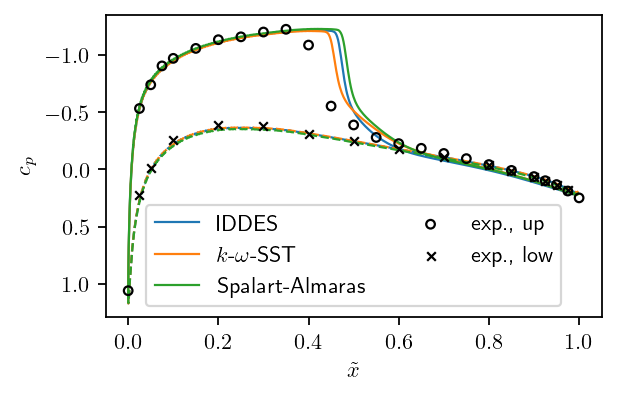

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_{:s}_g10000_ref3".format(model) for model in ["iddes", "ko", "sa"]]
labels = ["IDDES",  r"$k$-$\omega$-SST", "Spalart-Almaras"]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.075) # Adjust time !!!!!!!!!!!!!!!!!!!!!!!!!
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.075) # Adjust time !!!!!!!!!!!!!!!!!!!!!!!!!
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=labels[i])
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(loc=8, ncol=2)

ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_turb_model.pdf", bbox_inches="tight")
plt.show()

### 2D versus 3D

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.04...0.15s (110 snapshots)
Mean amplitude lower/upper side: 0.0384/0.0526
Mean stdev. lower/upper side: 0.0075/0.0112
L1/L2/Lmax upper side:  (0.04826669252185841, 0.007278433976837239, 0.3382771227673176)
L1/L2/Lmax lower side:  (0.01817625609849295, 0.0006028895973853731, 0.06134621754303332)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.015...0.051s (36 snapshots)
yPlus mean/min/max upper side: 6.7118/2.6084/9.6995
yPlus mean/min/max lower side: 7.3062/1.3448/8.6507
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha

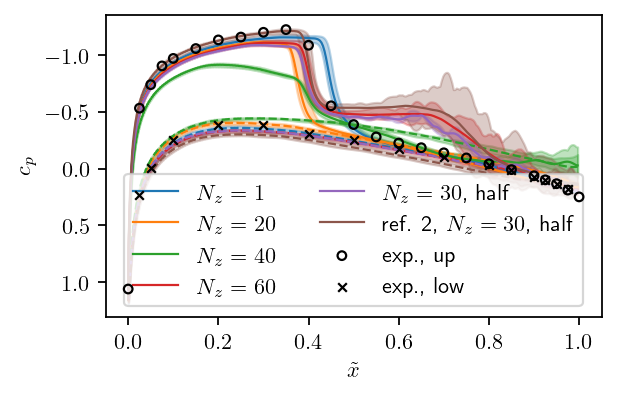

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5), sharey=True)

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha2_iddes_spalding_g10000_ref1{:s}".format(span) for span in ["", "_3D_d20", "_3D_d40", "_3D_d60", "_3D_half_d30"]]
cases.append("set1_alpha2_iddes_spalding_g2500_ref1_3D_half_d30")
labels = [r"$N_z=1$", r"$N_z=20$", r"$N_z=40$", r"$N_z=60$", r"$N_z=30$, half", "ref. 2, $N_z=30$, half"]
lw = 1.0
ms = 15

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.04, 0.15) # Adjust time !!!!!!!!!!!!!!!!!!!!!!!!!
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.015, 0.051) # Adjust time !!!!!!!!!!!!!!!!!!!!!!!!!
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3)
    ax.fill_between(data[1], data[7], data[9], color="C{:d}".format(i), alpha=0.3)
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls="-", lw=lw, label=labels[i])
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls="--", lw=lw)

ax.scatter(data_up.x, data_up.cp, marker="o", s=ms, color="k", lw=lw, facecolor="none", zorder=10, label="exp., up")
ax.scatter(data_low.x, data_low.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp., low")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(loc=8, ncol=2)

ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_2D_3D.pdf", bbox_inches="tight")
plt.show()

## Influence of various simulation parameters on set 1 with $\alpha = 4$
### Wall functions for $\nu_t$ and $\alpha_t$, tangential refinement

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g2500/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.1...0.25s (150 snapshots)
Mean amplitude lower/upper side: 0.2471/0.5774
Mean stdev. lower/upper side: 0.0610/0.1606
L1/L2/Lmax upper side:  (0.2595976745546675, 0.08096318159151504, 0.5047418777350571)
L1/L2/Lmax lower side:  (0.1447559946966771, 0.031609303041142046, 0.34085064895054196)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g2500/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.1...0.25s (150 snapshots)
yPlus mean/min/max upper side: 28.3337/11.3944/51.1832
yPlus mean/min/max lower side: 34.7134/7.4797/38.2621
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spaldi

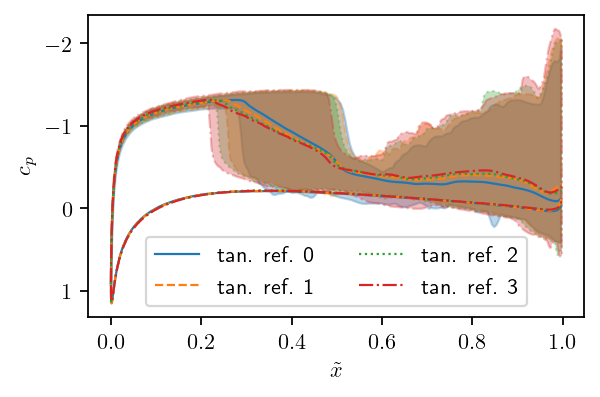

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha4_iddes_spalding_g2500{:s}".format(s) for s in ["", "_t1.5", "_t2.0", "_t2.5"]]
lw = 1.0
ms = 15
ls = ["-", "--", ":", "-."]

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.1)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.1)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    #ax.fill_between(data[0], data[2]-2*data[4], data[2]+2*data[4], color="C{:d}".format(i), alpha=0.3, ls=ls[i])
    ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3, ls=ls[i])
    #ax.fill_between(data[1], data[7], data[9], color="C{:d}".format(i), alpha=0.3, ls=ls[i])
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls=ls[i], lw=lw, label=r"tan. ref. {:d}".format(i))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls=ls[i], lw=lw)
    
ax.legend(loc=8, ncol=2)
ax.set_xlabel(r"$\tilde{x}$")
ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_g2500_tref_wall_function_alpha4.pdf", bbox_inches="tight")
plt.show()

### Default interpolation, uniform refinement

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_g10000/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.025...0.25s (225 snapshots)
Mean amplitude lower/upper side: 0.2105/0.5059
Mean stdev. lower/upper side: 0.0496/0.1205
L1/L2/Lmax upper side:  (0.22050738741759102, 0.07583375698541797, 0.7836185990398344)
L1/L2/Lmax lower side:  (0.16579314383371574, 0.03718550756364853, 0.36114462359900545)
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_g10000/postProcessing/surface/
Available time range t=0.001...0.25s
Computing statistics for t=0.025...0.25s (225 snapshots)
yPlus mean/min/max upper side: 8.1622/2.5892/12.9268
yPlus mean/min/max lower side: 10.1645/2.9496/10.9604
------------------------------------------------------------
Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_g10000_ref1/postPro

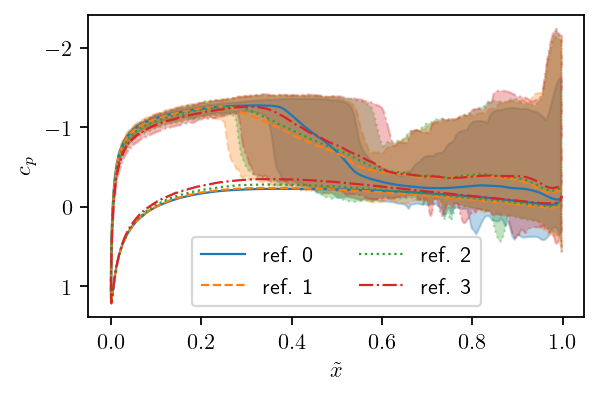

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))

data_up, data_low = cp_exp["set1"]
cases = ["set1_alpha4_iddes_g10000{:s}".format(s) for s in ["", "_ref1", "_ref2", "_ref3"]]
lw = 1.0
ms = 15
ls = ["-", "--", ":", "-."]

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/surface/"
    data = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.025)
    max_diff_up = np.mean(np.absolute(data[8] - data[6]))
    max_diff_low = np.mean(np.absolute(data[9] - data[7]))
    print("Mean amplitude lower/upper side: {:2.4f}/{:2.4f}".format(max_diff_low, max_diff_up))
    print("Mean stdev. lower/upper side: {:2.4f}/{:2.4f}".format(np.mean(data[5]), np.mean(data[4])))
    print("L1/L2/Lmax upper side: ", error_norms(data[0], data[2], data_up.x.values, data_up.cp.values))
    print("L1/L2/Lmax lower side: ", error_norms(data[1], data[3], data_low.x.values, data_low.cp.values))
    data_yp = average_surface_data(path, "yPlus_airfoil.raw", 0.025)
    print("yPlus mean/min/max upper side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[2]), np.min(data_yp[2]), np.max(data_yp[2])))
    print("yPlus mean/min/max lower side: {:1.4f}/{:1.4f}/{:1.4f}".format(np.mean(data_yp[3]), np.min(data_yp[3]), np.max(data_yp[3])))
    print("-"*60)
    ax.fill_between(data[0], data[6], data[8], color="C{:d}".format(i), alpha=0.3, ls=ls[i])
    ax.plot(data[0], data[2], c="C{:d}".format(i), ls=ls[i], lw=lw, label=r"ref. {:d}".format(i))
    ax.plot(data[1], data[3], c="C{:d}".format(i), ls=ls[i], lw=lw)
    
ax.legend(loc=8, ncol=2)
ax.set_xlabel(r"$\tilde{x}$")
ax.set_ylabel(r"$c_p$")
plt.gca().invert_yaxis()
plt.savefig(output + "set1_cp_g2500_ref_default_alpha4.pdf", bbox_inches="tight")
plt.show()

In [3]:
path = run + "set1_alpha4_iddes_spalding_g2500_ref1_3D_half_d30/postProcessing/surface/"
t_up, cp_up = sample_surface_field(path, "total(p)_coeff_airfoil.raw", 0.5, 0.0)

Found 250 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g2500_ref1_3D_half_d30/postProcessing/surface/
Available time range t=0.001...0.25s
Sample location at x/c=0.5010, z/c=0.0000 on upper side


In [4]:
cp_up_zm = cp_up - np.mean(cp_up)

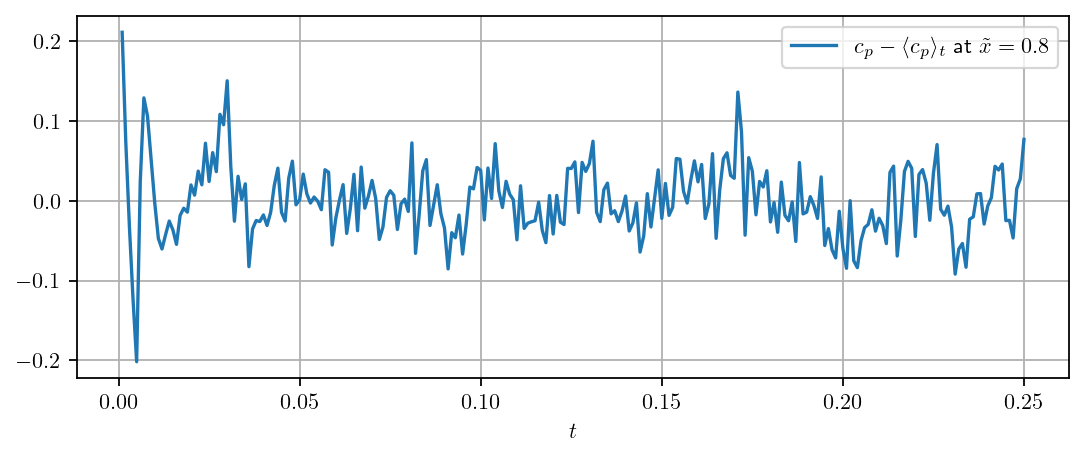

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3), sharex=True)

ax.plot(t_up, cp_up_zm, label=r"$c_p - \langle c_p\rangle_t$ at $\tilde{x}=0.8$")
ax.set_xlabel(r"$t$")
ax.grid()
ax.legend()
plt.show()

In [6]:
T = np.max(t_up)
print(T)
n_samples = t_up.shape[0]
dt = T / n_samples
print(dt)
df = 1/T
print(df)
dw = 2.0*np.pi/T
print(dw)
print(dw*n_samples/2)

0.25
0.001
4.0
25.132741228718345
3141.592653589793


In [7]:
#start_at = 1000
#win = np.kaiser(len(cl_uni.squeeze()[start_at:]), 5)
X = np.fft.fft(cp_up_zm)
f_fft = np.fft.fftfreq(X.shape[0])*X.shape[0]*df
print(f_fft[:20])

[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64. 68.
 72. 76.]


(250,)
36.00000000000001
0.5326945656284401
31.763042260509707


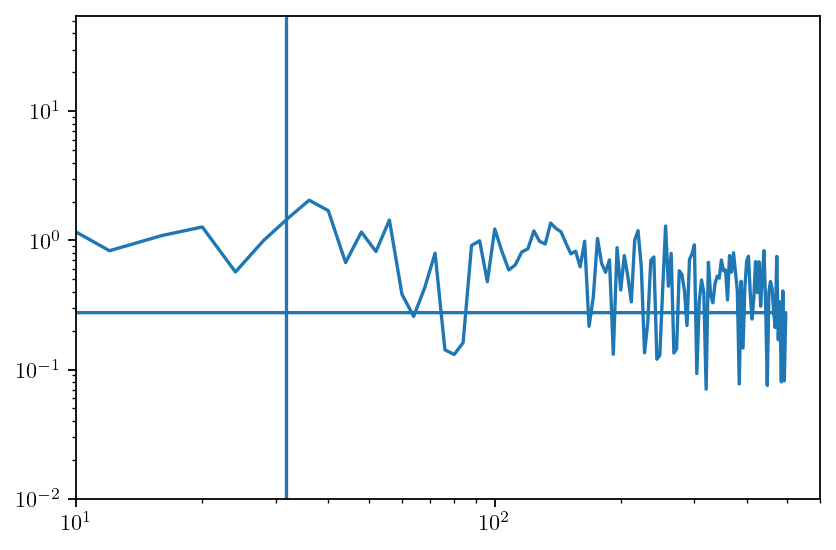

In [8]:
plt.plot(f_fft, np.absolute(X))
plt.xscale('log')
plt.yscale('log')
chord = 0.6010500
U_inf = 255.22
plt.xlim(10, 600)
plt.ylim(10e-3, 55)
print(X.shape)
f_max = f_fft[np.argmax(np.where(f_fft > 0, np.absolute(X), 0))]
print(f_max)
print(f_max*2*np.pi*chord/U_inf)
print(0.47/(2*np.pi*chord/U_inf))
plt.axvline(0.47/(2*np.pi*chord/U_inf))

0.4773248795953763 32.25806451612903
0.5918828506982666 40.0
0.6510711357680932 44.0


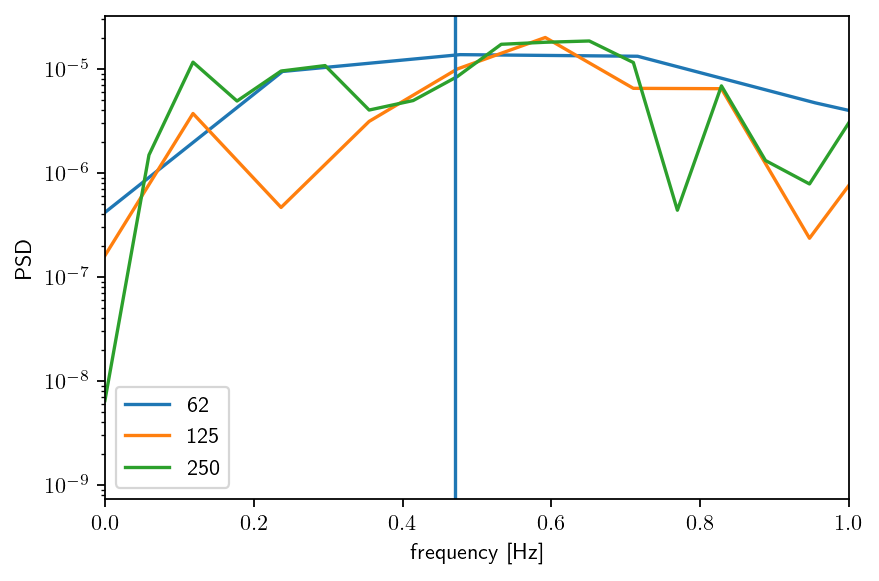

In [9]:
from scipy.signal import welch

for nseg in [62, 125, 250]:
    f, Pxx_den = welch(cp_up_zm, 1.0/dt, nperseg=nseg)
    #f, Pxx_den = welch(cl_uni.squeeze()[1500:], f_s)
    plt.semilogy(f*2*np.pi*chord/U_inf, Pxx_den, label=str(nseg))
    print(f[np.argmax(Pxx_den)]*2*np.pi*chord/U_inf, f[np.argmax(Pxx_den)])
plt.xlim([0, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.axvline(0.47)
plt.legend()